# Visualizing The  Gender Gap In College Degrees

---
**Is there a gender gap in college degrees?**

[The Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

In this project, we are going use Randal Olson's data set to visualize percentage of bachelor's degrees granted to women from 1970 to 2012. <br>Our purpose is to determine whether gender gap in college degrees exist.

**Setting Up The Environment**

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

**Reading & Exploring**

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [3]:
women_degrees.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


**Plotting**

In [4]:
#separate majors into 3 categories

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
cats = [stem_cats,lib_arts_cats,other_cats]

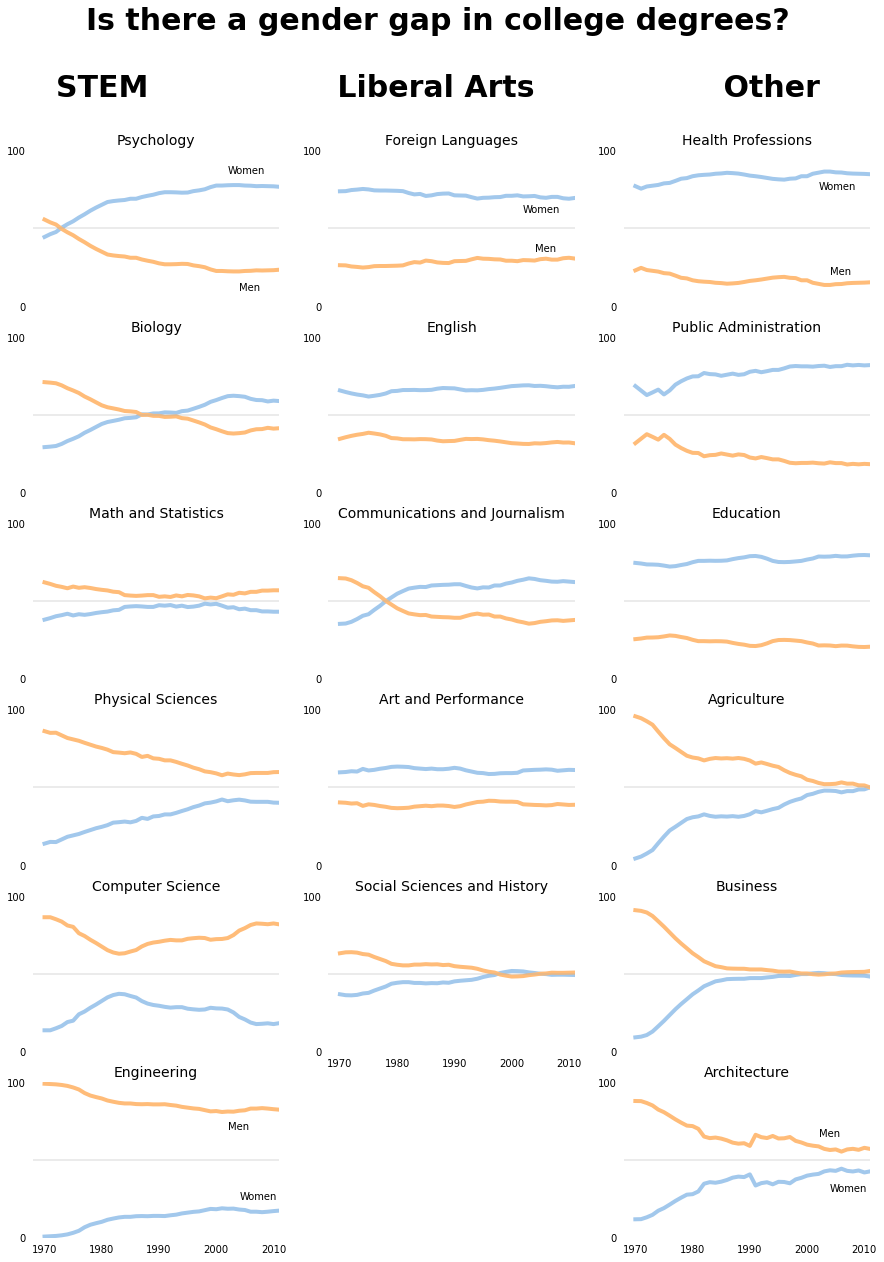

<Figure size 432x288 with 0 Axes>

In [5]:
#using colorblind friendly colors
cb_light_blue = (162/255, 200/255, 236/255)
cb_light_orange = (255/255, 188/255, 121/255)

#plots
fig = plt.figure(figsize=(15,20))
for i in range(3):
    for j in range(len(cats[i])): 
        ax = fig.add_subplot(6, 3, 3*j+i+1)
        ax.plot(women_degrees['Year'], women_degrees[cats[i][j]], c= cb_light_blue, label='Women', linewidth=4)
        ax.plot(women_degrees['Year'], 100-women_degrees[cats[i][j]], c= cb_light_orange, label='Men', linewidth=4)
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100]) #set y-axis labels to only 0 and 100
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) #set horizontal line
        ax.set_title(cats[i][j], fontsize = 14)
        
        for key,spine in ax.spines.items(): #removing spines
            spine.set_visible(False)
        
        #annotate "Women" and "Men"
        if (i == 0 and j == 0):
            ax.text(2002, 85, 'Women')
            ax.text(2004, 10, 'Men')
            
        if (i == 0 and j == 5):
            ax.text(2002, 70, 'Men')
            ax.text(2004, 25, 'Women')
            ax.tick_params(labelbottom='on')
            
        if (i == 1 and j == 0):
            ax.text(2002, 60, 'Women')
            ax.text(2004, 35, 'Men')
            
        if (i == 1 and j == 4):
            ax.tick_params(labelbottom='on')
            
        if (i == 2 and j == 0):
            ax.text(2002, 75, 'Women')
            ax.text(2004, 20, 'Men')
            
        if (i == 2 and j == 5):
            ax.text(2002, 65, 'Men')
            ax.text(2004, 30, 'Women')
            ax.tick_params(labelbottom='on')
            
fig.suptitle("Is there a gender gap in college degrees?" + "\n\n" + "STEM                  " 
             + "Liberal Arts" + "                  Other", fontsize = 30, fontweight = 'bold')

plt.show()
plt.savefig("gender_degrees.png")


## Conclusion

**In general, the percentage of women that were granted a bachelor's degree has increased throughout the years, but based on our visualization it is apparent that the gender gap in college degrees exists.**

**Things to note:**

- **Psychology (STEM), Biology (STEM) and Communications and journalism (Liberal Arts)** <br>Started from being predominantly male in 1970 to become predominantly female in 2012.
- **Social Sciences and History(Liberal Arts) and Business (Other)** <br>Have been able to decrease the gender gap throughout the years. In 1970 there was a massive gender gap, but since late 1990 the dominant gender has changed a few times. By 2012, the gap is almost nonexistent, with the male as the slight majority.
- **Physical Sciences (STEM), Agriculture (Other), and Architecture (Other)** <br>Have also been able to minimize the gender gap, even though there is still a noticeable difference in favor of the male.
- **Other** <br>Stay relatively the same.